<a href="https://colab.research.google.com/github/fahrabyf200/PVCK_Ganjil_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


transformasi linear Brightness

mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan : 50


/tmp/ipython-input-492259550.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_images[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


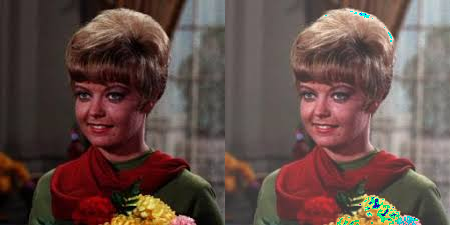

In [18]:
print('mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('Error, not a Number')

original = cv.imread('/content/drive/MyDrive/drive/MyDrive/female.tiff')
brightness_images = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_images[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_images = cv.cobvertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_images))
cv2_imshow(final_frame)

Tugas Praktikum d1

1. Implement image inversion on Google Collaboratory using the formulas found in the
Theory Review section,

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


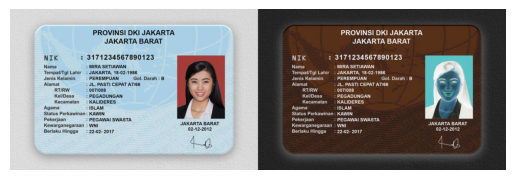

In [19]:
import cv2
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive to access image file
drive.mount('/content/drive')

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/drive/MyDrive/ktp.jpg')

# Create a blank image to store the inverted result
inverse_image = np.zeros(original_image.shape, original_image.dtype)

# Iterate through each pixel to apply the inverse operation
# g(x) = 255 - f(x)
for y in range(original_image.shape[0]):
    for x in range(original_image.shape[1]):
        for c in range(original_image.shape[2]):
            inverse_image[y, x, c] = 255 - original_image[y, x, c]

# Combine the original and inverted images for display
final_frame = cv2.hconcat((original_image, inverse_image))

# Display the result
plt.imshow(cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Implement the contrast transformation in Google Collaboratory using the formula found
in the Theory Review section for contrast,

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


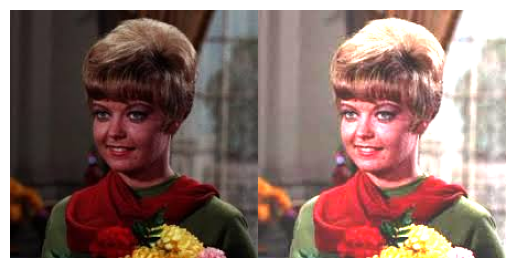

In [21]:
import cv2
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive to access image file
drive.mount('/content/drive')

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/drive/MyDrive/female.tiff')

# Get user input for contrast and brightness
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

# Create a blank image to store the result
contrast_image = np.zeros(original_image.shape, original_image.dtype)

# Apply the contrast and brightness formula with truncation
# g(x,y) = a*f(x,y) + b
for y in range(original_image.shape[0]):
    for x in range(original_image.shape[1]):
        for c in range(original_image.shape[2]):
            new_pixel = contrast * original_image[y, x, c] + brightness
            # Truncate the value to be within 0-255
            contrast_image[y, x, c] = np.clip(new_pixel, 0, 255)

# Combine the original and transformed images for display
final_frame = cv2.hconcat((original_image, contrast_image))

# Display the result
plt.imshow(cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

3. Implement the logarithmic brightness transformation in Google Collaboratory using the
formula found in the Theory Review section for log transformation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Masukkan nilai kecerahan: 50


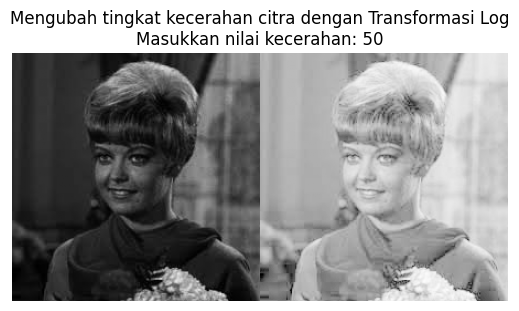

In [24]:
import cv2
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive to access image file
drive.mount('/content/drive')

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/drive/MyDrive/female.tiff')

# Convert image to float32 to perform calculations
original_image = original_image.astype(np.float32)

# Get user input for brightness
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

# Create a blank image to store the transformed result
# The log transformation is usually applied to grayscale images, so converting it first is good practice.
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
log_image = np.zeros(gray_image.shape, gray_image.dtype)

# Calculate the constant 'c'
c = 255 / np.log(1 + 255)

# Apply the logarithmic transformation
for y in range(gray_image.shape[0]):
    for x in range(gray_image.shape[1]):
        r = gray_image[y, x]
        s = c * np.log(1 + r)
        log_image[y, x] = np.clip(s, 0, 255)

# Convert back to uint8 for display
log_image = log_image.astype(np.uint8)
original_image = original_image.astype(np.uint8)

# Combine the original and transformed images for display
# Convert original image to grayscale for consistent comparison
original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
final_frame = cv2.hconcat((original_gray, log_image))

# Display the result
plt.imshow(final_frame, cmap='gray')
plt.axis('off')
plt.title('Mengubah tingkat kecerahan citra dengan Transformasi Log\nMasukkan nilai kecerahan: ' + str(brightness))
plt.show()